In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vxtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv(r"C:\ml_projects\sentiment_project\Reviews.csv")

In [3]:
print(f"dataset shape {data.shape}")
data.head()

dataset shape (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Columns Features
print(f"Feature Name:{data.columns.values}")
#Check for null values 
print("\nMissing values in each column:")
print(data.isnull().sum())



Feature Name:['Id' 'ProductId' 'UserId' 'ProfileName' 'HelpfulnessNumerator'
 'HelpfulnessDenominator' 'Score' 'Time' 'Summary' 'Text']

Missing values in each column:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [5]:
# 1. Drop all rows that contain any null values
data.dropna(inplace=True)


In [6]:
print(f"Dataset shape after dropping null values: {data.shape}")


Dataset shape after dropping null values: (568401, 10)


In [7]:
#Double-check that all nulls are gone
print("\nRemaining null values:")
print(data.isnull().sum())


Remaining null values:
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [8]:
# 1. Create the 'length' column based on your 'Text' column
data['length'] = data['Text'].apply(len)
# 2. View the first 5 rows to see the new column at the end
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


In [9]:
#just to check the length column
# Check the 10th record 
print(f"'Text' column value: {data.iloc[10]['Text']}")
print(f"Calculated Length: {len(data.iloc[10]['Text'])}")
print(f"Value in 'length' column: {data.iloc[10]['length']}")

'Text' column value: I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!
Calculated Length: 779
Value in 'length' column: 779


In [10]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
length                     int64
dtype: object

In [11]:
# Analyzing the 'Score' column in your dataset
print(f"Rating value count: \n{data['Score'].value_counts()}")

Rating value count: 
Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64


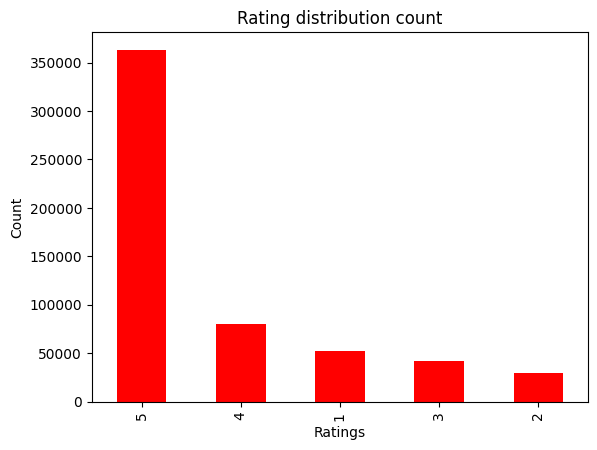

In [12]:
#lets point the above values in a bar graph 
# Bar plot to visualize the total counts of each rating
data['Score'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [13]:
# Finding the percentage distribution of each rating in your dataset
print(f"Rating value count - percentage distribution: \n{round(data['Score'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
Score
5    63.88
4    14.19
1     9.19
3     7.50
2     5.23
Name: count, dtype: float64


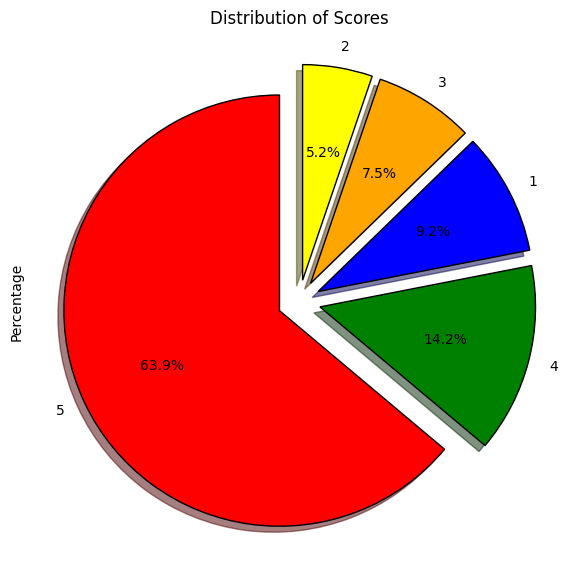

In [15]:


# 1. Prepare the data (Percentages)
tags = data['Score'].value_counts() / data.shape[0]

# 2. Set up the figure
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth': 1, "edgecolor": 'black'}
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# 3. Create the pie chart
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, 
          startangle=90, wedgeprops=wp, explode=explode, label='Percentage')

# 4. Display the chart
plt.title('Distribution of Scores')
plt.show()

In [18]:
# Create the 'feedback' column to match the tutorial
data['feedback'] = data['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Now run the exact code from your reference image
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    486394
0     82007
Name: count, dtype: int64


In [19]:
# 1. Extracting the 'Text' value for one record with feedback = 0 (Negative)
review_0 = data[data['feedback'] == 0].iloc[1]['Text']
print("Negative Feedback Sample:")
print(review_0)

print("\n" + "="*30 + "\n")

# 2. Extracting the 'Text' value for one record with feedback = 1 (Positive)
review_1 = data[data['feedback'] == 1].iloc[1]['Text']
print("Positive Feedback Sample:")
print(review_1)

Negative Feedback Sample:
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.


Positive Feedback Sample:
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


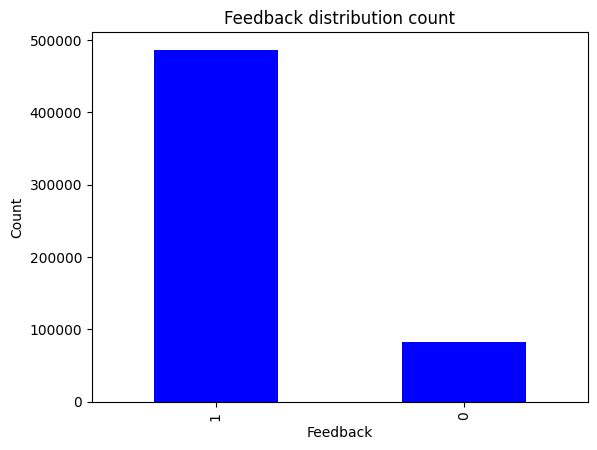

In [20]:
# Bar graph to visualize the total counts of each feedback category (0 and 1)
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [21]:
# Finding the percentage distribution of each feedback category
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    85.57
0    14.43
Name: count, dtype: float64


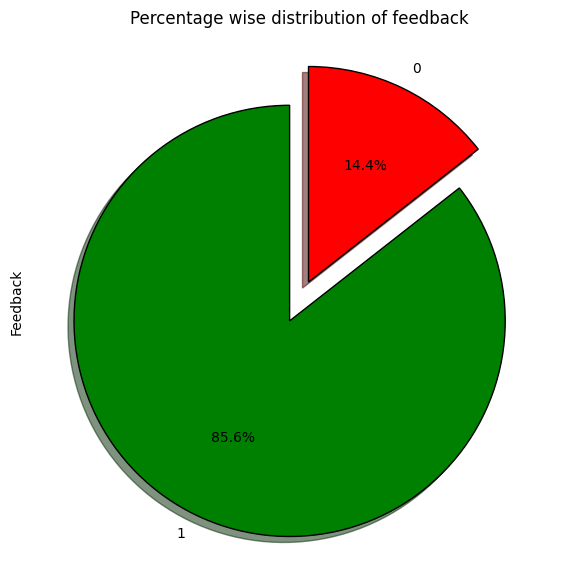

In [22]:
# 1. Prepare the data (Percentages for the feedback column)
tags = data['feedback'].value_counts() / data.shape[0]

# 2. Set up the figure and styling
fig = plt.figure(figsize=(7,7))
colors = ('green', 'red') # Green for Positive (1), Red for Negative (0)
wp = {'linewidth': 1, "edgecolor": 'black'}
explode = (0.1, 0.1)

# 3. Create the pie chart
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, 
          startangle=90, wedgeprops=wp, explode=explode)

# 4. Add labeling
plt.title('Percentage wise distribution of feedback')
plt.ylabel('Feedback')
plt.show()

In [23]:
# 1. See which ratings are in the 'Negative' (0) feedback category
print("Ratings for Feedback = 0:")
print(data[data['feedback'] == 0]['Score'].value_counts())

print("\n" + "-"*30 + "\n")

# 2. See which ratings are in the 'Positive' (1) feedback category
print("Ratings for Feedback = 1:")
print(data[data['feedback'] == 1]['Score'].value_counts())

Ratings for Feedback = 0:
Score
1    52264
2    29743
Name: count, dtype: int64

------------------------------

Ratings for Feedback = 1:
Score
5    363102
4     80654
3     42638
Name: count, dtype: int64


In [24]:
# Analyzing the distribution of products in your dataset
print(f"Product ID value count: \n{data['ProductId'].value_counts()}")

Product ID value count: 
ProductId
B007JFMH8M    913
B002QWP89S    632
B0026RQTGE    632
B002QWHJOU    632
B002QWP8H0    632
             ... 
B009GTIHG0      1
B004CZUOSM      1
B004CHDG44      1
B0001PB9FY      1
B00144C10S      1
Name: count, Length: 74257, dtype: int64


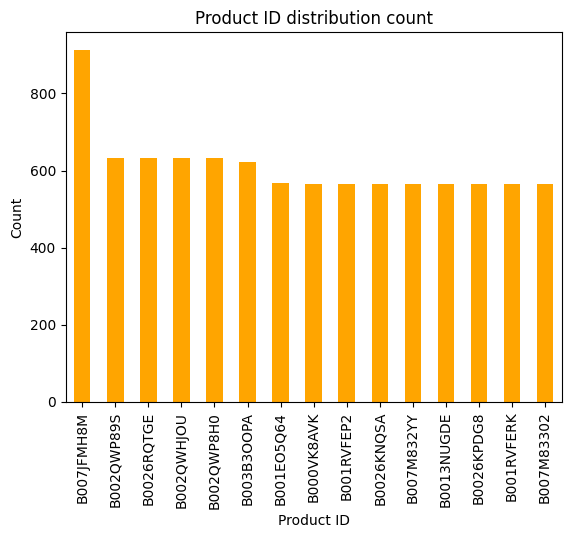

In [25]:
# Bar graph to visualize the top 15 most frequent Product IDs
data['ProductId'].value_counts().head(15).plot.bar(color = 'orange')

# Adding labels to match your tutorial style
plt.title('Product ID distribution count')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.show()

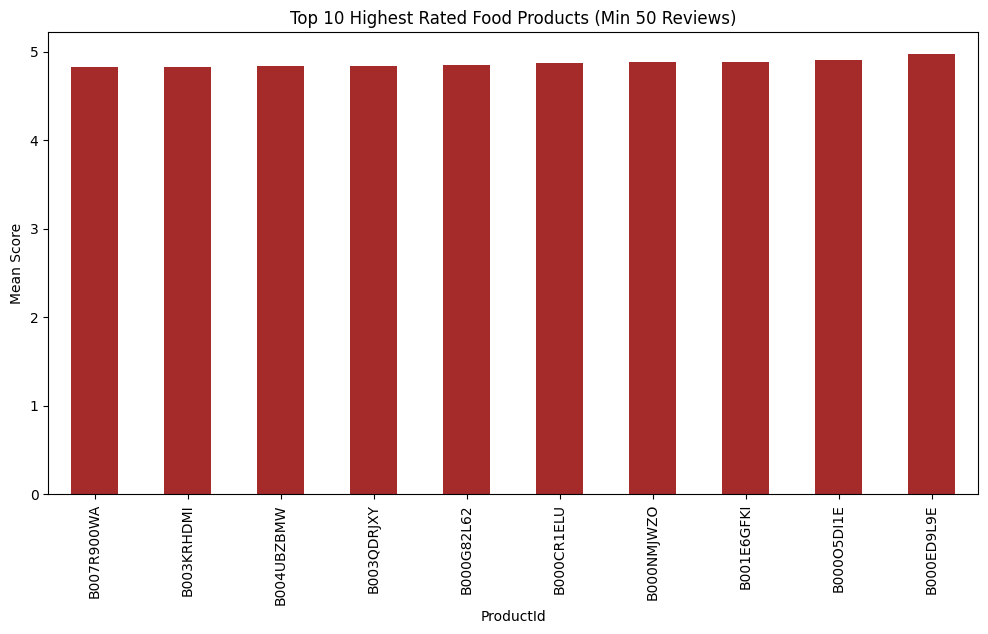

In [33]:
# Grouping by ProductId and finding the mean score
# We filter for products with at least 50 reviews to ensure the average is reliable
top_products = data['ProductId'].value_counts()[data['ProductId'].value_counts() > 50].index
mean_ratings = data[data['ProductId'].isin(top_products)].groupby('ProductId')['Score'].mean().sort_values()

# Plotting the 10 lowest and 10 highest rated frequent products
plt.figure(figsize=(12, 6))
mean_ratings.tail(10).plot.bar(color='brown')
plt.title('Top 10 Highest Rated Food Products (Min 50 Reviews)')
plt.ylabel('Mean Score')
plt.show()

In [31]:
# 1. Group by ProductId and find the average score for each food item
food_stats = data.groupby('ProductId')['Score'].mean().sort_values(ascending=False)

# 2. Print the top 10 highest-rated food products
print("Top 10 Highest Rated Food Products (Average Score):")
print(food_stats.head(10))

Top 10 Highest Rated Food Products (Average Score):
ProductId
B009WVB40S    5.0
B009PIAFTE    5.0
B009PG8MVO    5.0
B009PFJUF2    5.0
B009PCDDO4    5.0
B009OY38SY    5.0
B009OM66IU    5.0
B009OM65H2    5.0
B009OM65GI    5.0
B009O7DGEW    5.0
Name: Score, dtype: float64


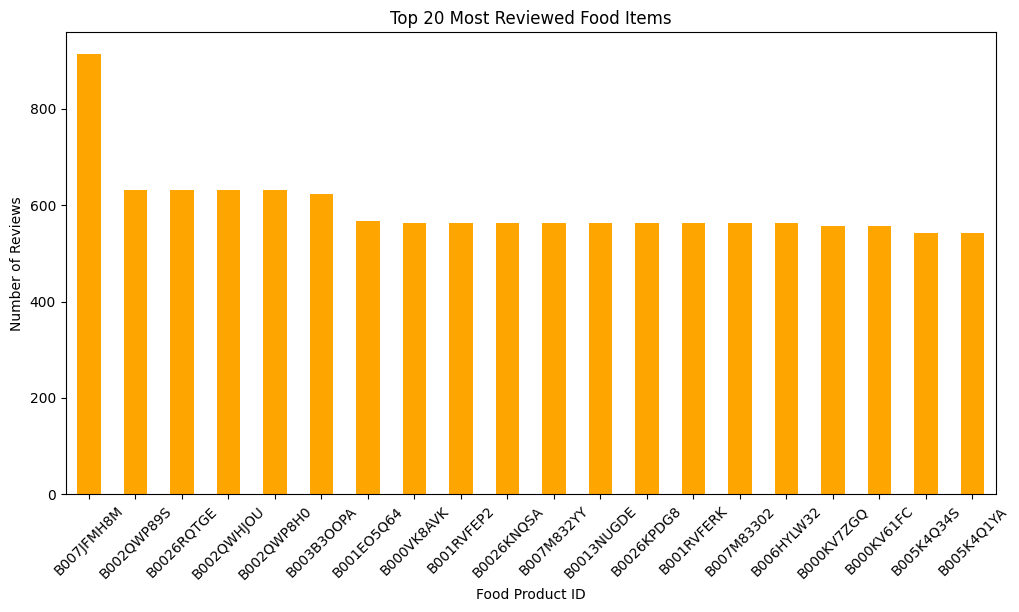

In [32]:


# Plotting the top 20 most-reviewed food products
plt.figure(figsize=(12, 6))
data['ProductId'].value_counts().head(20).plot.bar(color='orange')

plt.title('Top 20 Most Reviewed Food Items')
plt.xlabel('Food Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Statistical summary of the 'length' column
data['length'].describe()

count    568401.000000
mean        436.246170
std         445.351629
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: length, dtype: float64

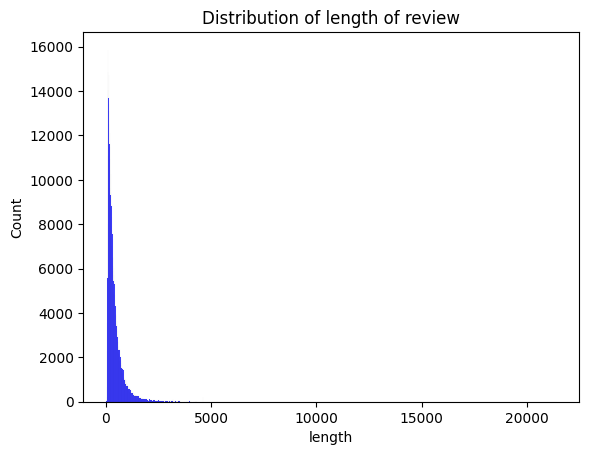

In [34]:
sns.histplot(data['length'], color='blue').set(title='Distribution of length of review')
plt.show()

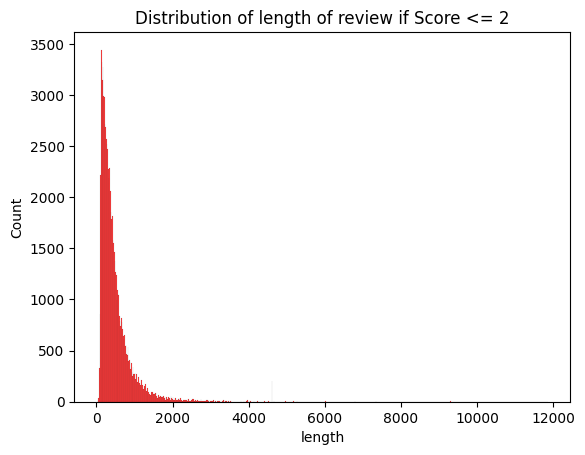

In [35]:
# Visualizing length for negative reviews (Score 1 or 2)
# We filter the data where Score is less than or equal to 2
sns.histplot(data[data['Score'] <= 2]['length'], color='red').set(title='Distribution of length of review if Score <= 2')
plt.show()

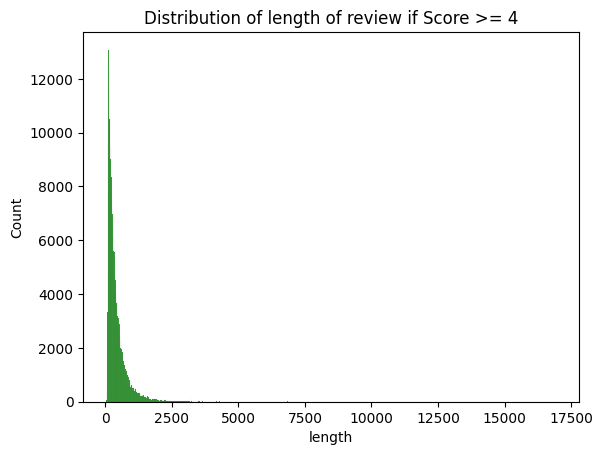

In [36]:
# Visualizing length for positive reviews (Score 4 or 5)
sns.histplot(data[data['Score'] >= 4]['length'], color='green').set(title='Distribution of length of review if Score >= 4')
plt.show()

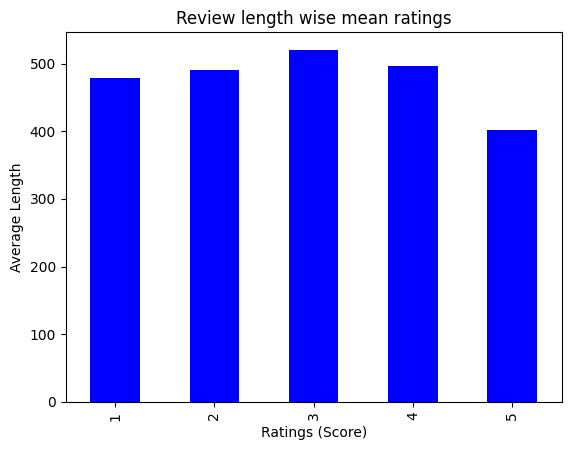

In [37]:
# Grouping by Score and finding the average length for each rating level
# This exactly replicates the logic shown in your reference image
data.groupby('Score')['length'].mean().plot.bar(color='blue')

# Adding labels to match your specific dataset
plt.title('Review length wise mean ratings')
plt.xlabel('Ratings (Score)')
plt.ylabel('Average Length')
plt.show()

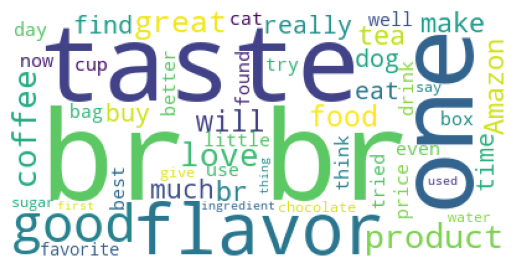

In [43]:
# Take a random sample of 1000 reviews to speed it up
sampled_data = data['Text'].dropna().sample(n=1000, random_state=42).astype(str)
reviews_combined = " ".join(sampled_data)

wc = WordCloud(background_color='white', max_words=50).generate(reviews_combined)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [48]:
# 1. Isolate reviews by Score (1-2 is Negative, 4-5 is Positive)
neg_reviews_series = data[data['Score'] <= 2]['Text'].dropna().astype(str).str.lower()
pos_reviews_series = data[data['Score'] >= 4]['Text'].dropna().astype(str).str.lower()

# 2. Convert to sets of words (Sets are 100x faster for 'not in' logic)
neg_words_set = set(" ".join(neg_reviews_series).split())
pos_words_set = set(" ".join(pos_reviews_series).split())

# 3. Extract unique words (Same logic as Image 39, but optimized)
unique_negative = " ".join([word for word in neg_words_set if word not in pos_words_set])
unique_positive = " ".join([word for word in pos_words_set if word not in neg_words_set])

print(f"Logic complete. Unique Negative: {len(unique_negative.split())} words.")

Logic complete. Unique Negative: 62277 words.


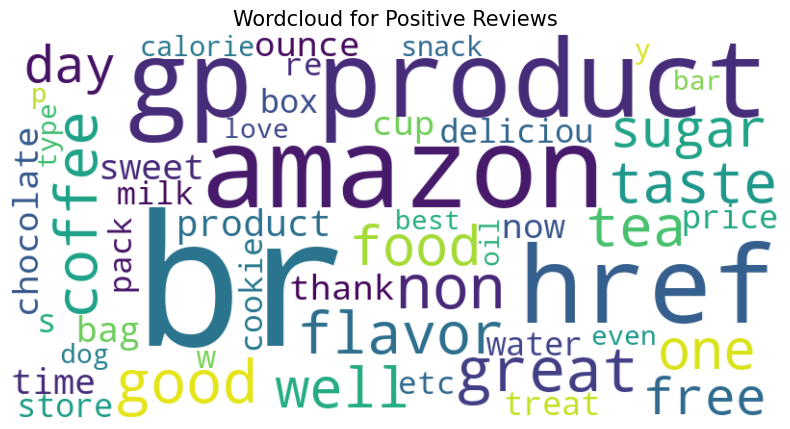

In [50]:
# Initialize for Positive
wc_pos = WordCloud(background_color='white', max_words=50, width=800, height=400)

plt.figure(figsize=(10, 5))
plt.imshow(wc_pos.generate(unique_positive), interpolation='bilinear')
plt.title('Wordcloud for Positive Reviews', fontsize=15)
plt.axis('off')
plt.show()

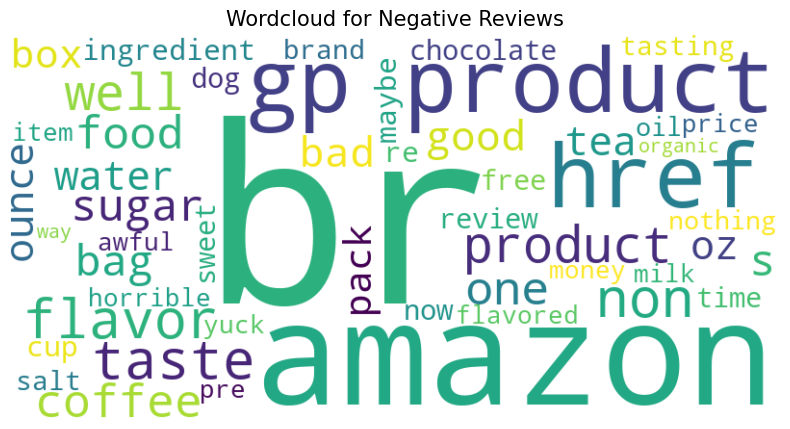

In [51]:
wc_neg = WordCloud(background_color='white', max_words=50, width=800, height=400)

plt.figure(figsize=(10, 5))
plt.imshow(wc_neg.generate(unique_negative), interpolation='bilinear')
plt.title('Wordcloud for Negative Reviews', fontsize=15)
plt.axis('off')
plt.show()